# Regression Analysis of Real Estate Data

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Exploratory Data Analysis

### Data Loading

In [2]:
data=pd.read_csv('Real Estate.csv')
data.head(5)

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


### Data Cleaning

#### Data Types

In [3]:
data.dtypes

house age                              float64
distance to the nearest MRT station    float64
number of convenience stores             int64
latitude                               float64
longitude                              float64
house price of unit area               float64
dtype: object

#### Missing Values

In [4]:
data.isnull().sum()

house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64

#### Outliers Detection

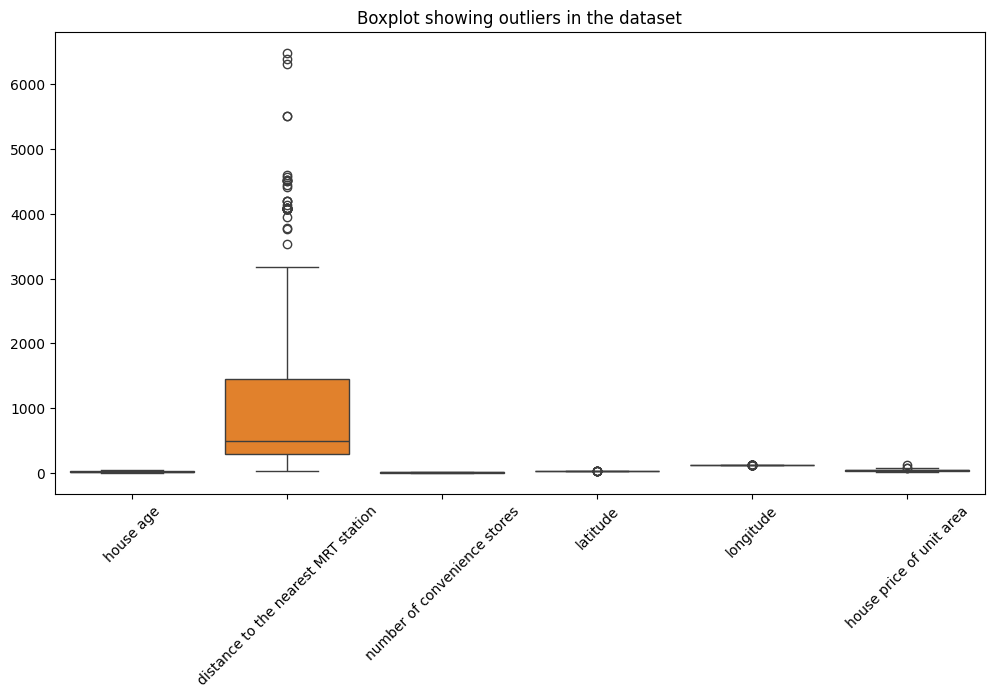

In [5]:
# Specify the columns you want to include in the boxplot
columns = ['house age', 'distance to the nearest MRT station', 'number of convenience stores', 'latitude', 'longitude', 'house price of unit area']

# Create a boxplot for the specified columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[columns])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot showing outliers in the dataset')
plt.show()

#### Outliers Correction

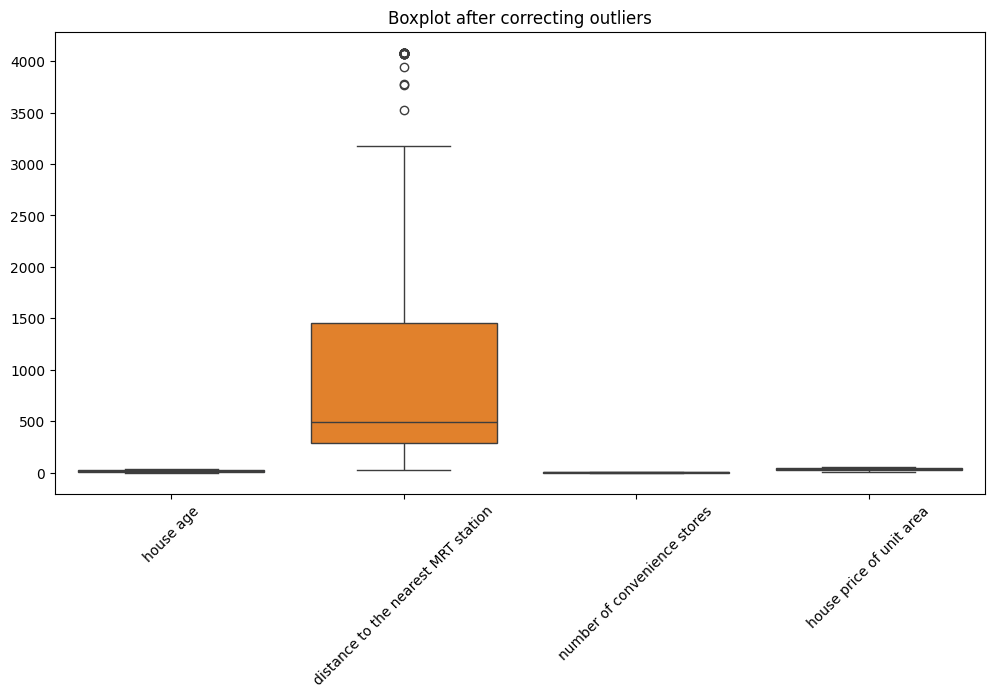

In [6]:
# Define a function to cap outliers in a DataFrame
def cap_outliers(df, columns, threshold=0.95):
    for col in columns:
        # Calculate the threshold values for capping
        cap_value = df[col].quantile(threshold)
        
        # Cap the outliers in the specified column
        df[col] = df[col].clip(upper=cap_value)
    
    return df

# Specify the columns to correct for outliers
columns_to_correct = ['house age', 'distance to the nearest MRT station', 'number of convenience stores', 'house price of unit area']

# Correct outliers in the dataset
dataset_corrected = cap_outliers(data.copy(), columns=columns_to_correct)

# Visualize the corrected data
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset_corrected[columns_to_correct])
plt.xticks(rotation=45)
plt.title('Boxplot after correcting outliers')
plt.show()

#### Duplicates

In [7]:
data.duplicated().sum()

np.int64(0)

## Data Profiling and Visualization

#### Descriptive Statistics

In [8]:
data.describe()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


#### Data Distribution

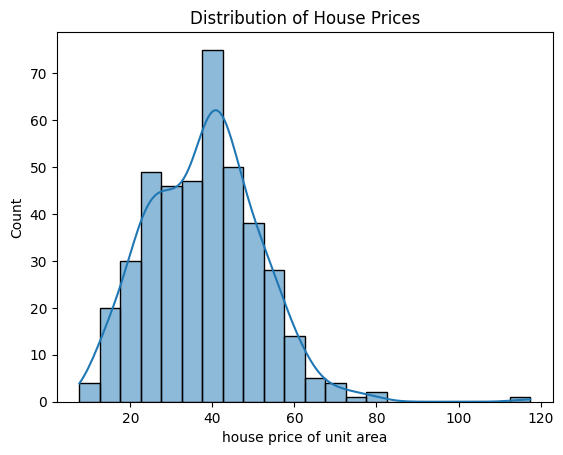

In [9]:
sns.histplot(data['house price of unit area'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

* Majority of house prices fall between 20 and 60.
* Fewer houses with very high prices (beyond 80).

#### House Price vs. Distance to Nearest MRT Station

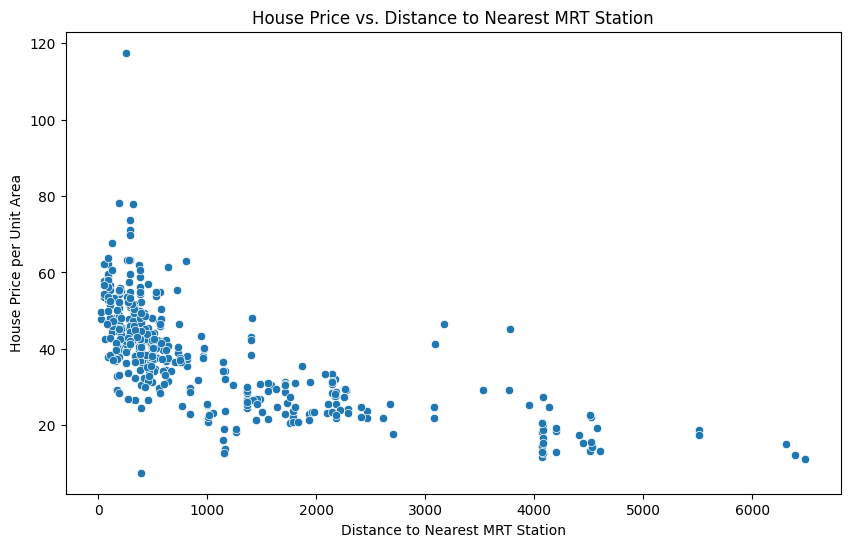

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['distance to the nearest MRT station'], y=data['house price of unit area'])
plt.title('House Price vs. Distance to Nearest MRT Station')
plt.xlabel('Distance to Nearest MRT Station')
plt.ylabel('House Price per Unit Area')
plt.show()

* Negative Correlation: The plot shows a negative correlation between house prices and distance to the nearest MRT station, as the distance to the MRT station increases, the house price per unit area decreases.
* High Concentration of Data Points Near MRT Stations:A large number of data points are clustered at distances close to the MRT station, indicating that most houses in the dataset are located relatively close to MRT stations. This is because proximity to public transportation is a desirable feature.

#### Correlation Matrix

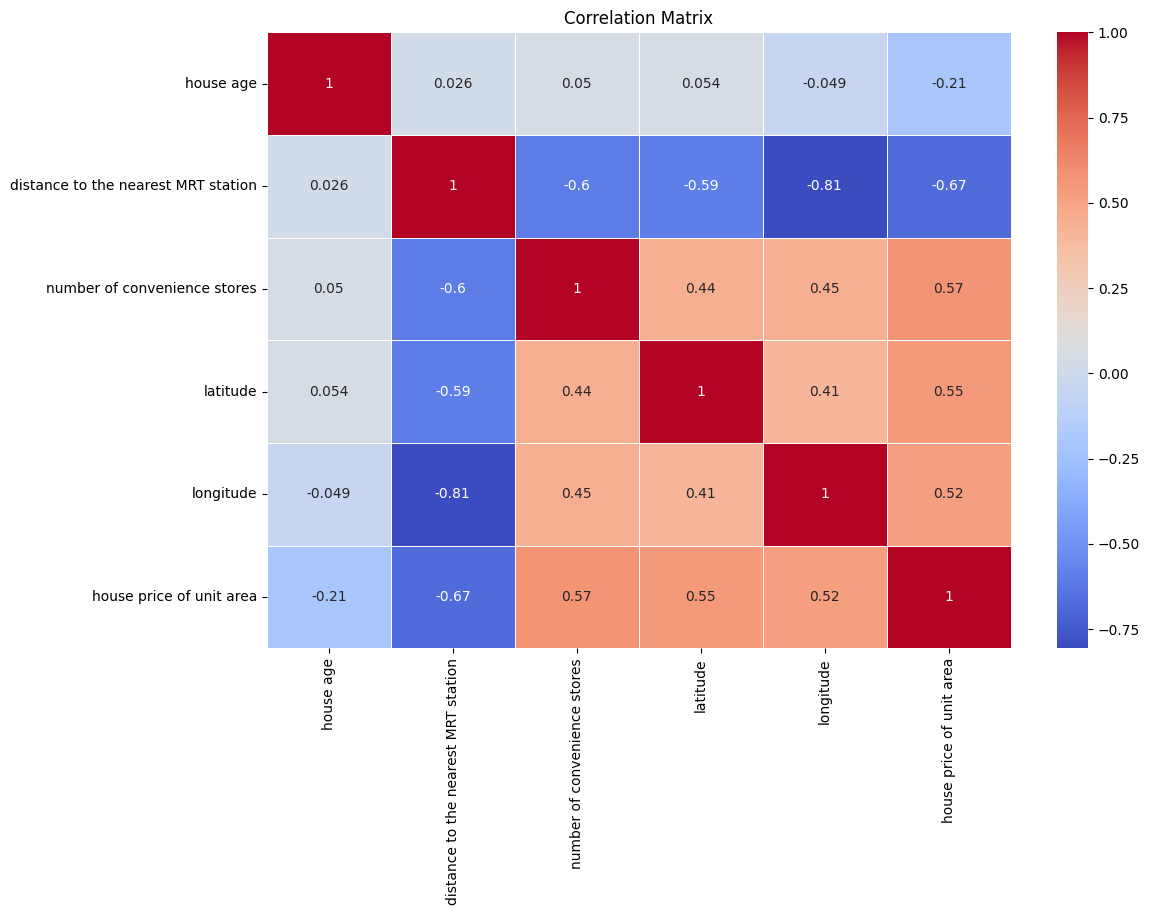

In [11]:
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

From identifying the patterns of the correlation between different variables. We have a pairplot below visualizing the exploration of the relationships between the variables.

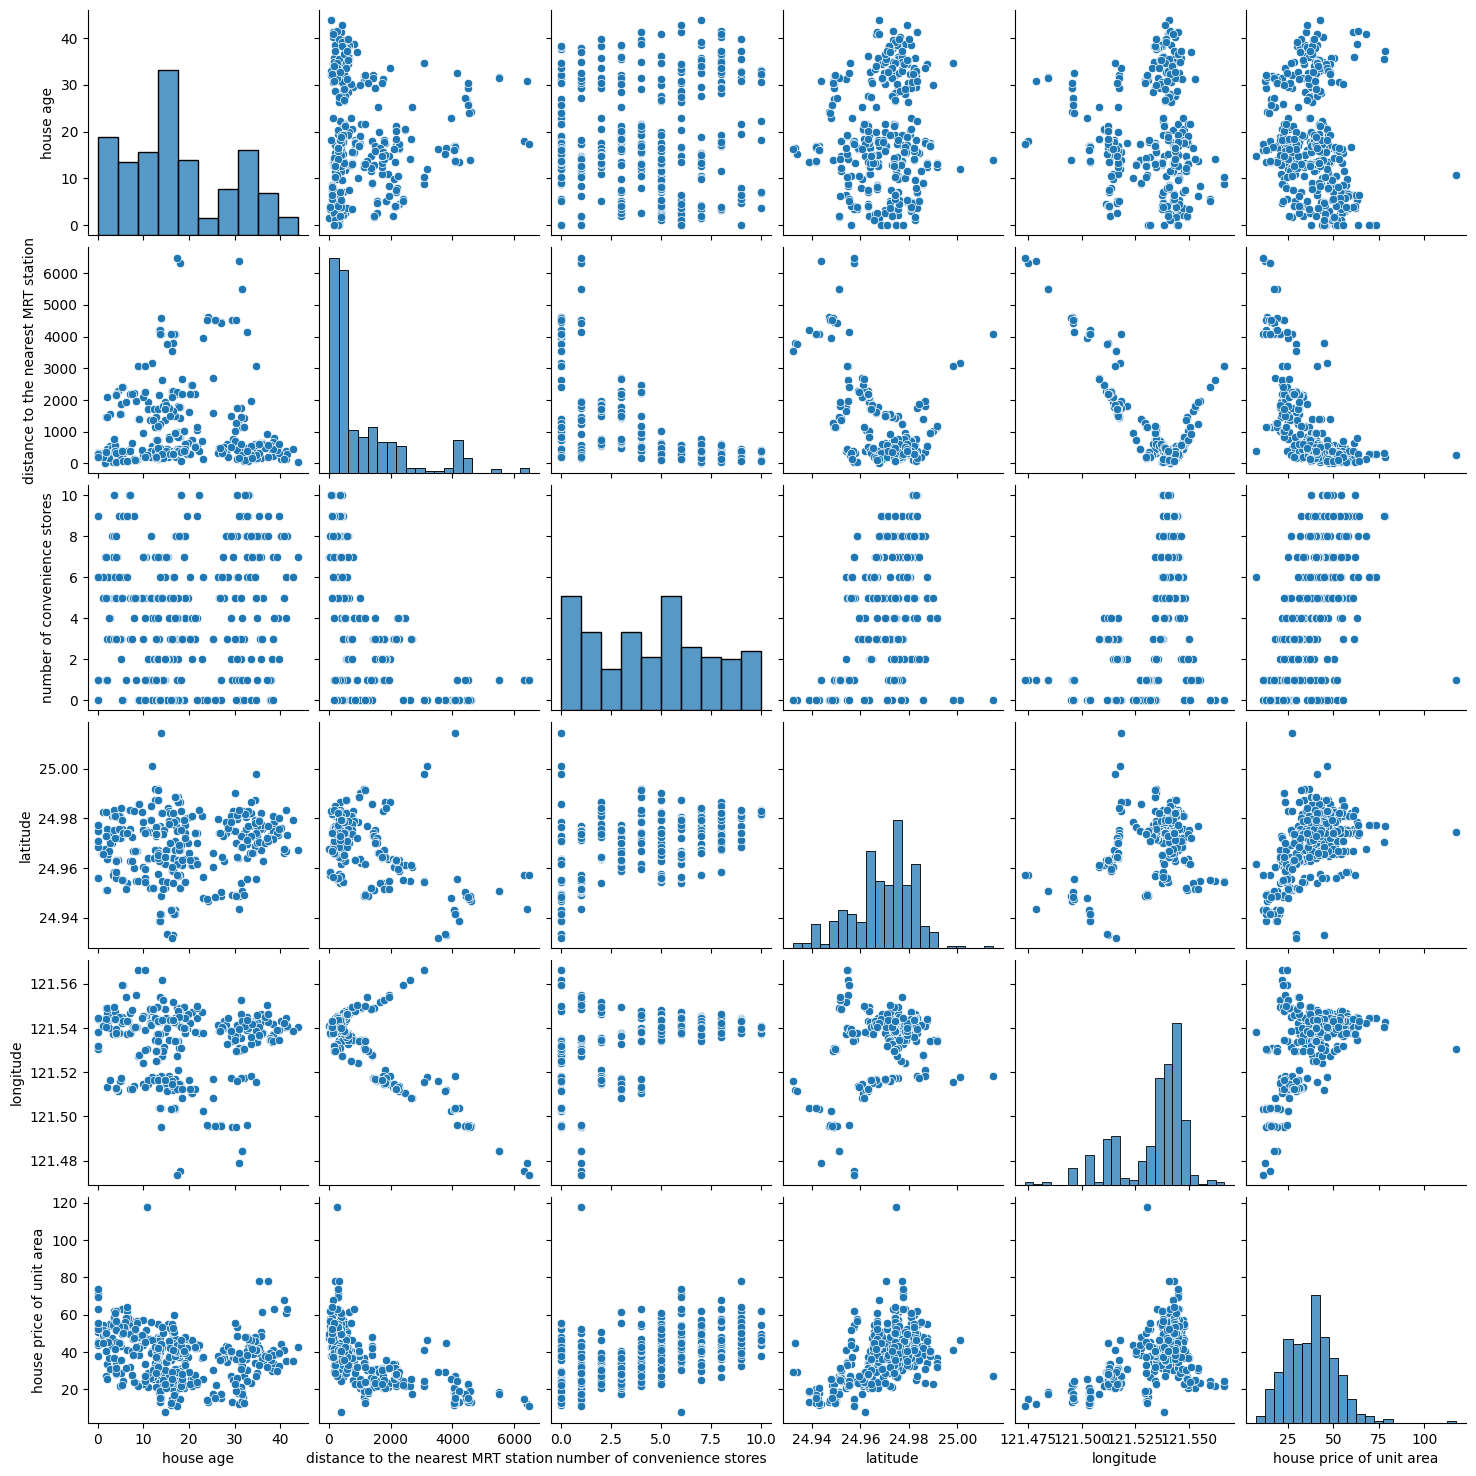

In [12]:
# Exploring Relationships Between Variables
sns.pairplot(data[['house age', 'distance to the nearest MRT station', 'number of convenience stores', 'latitude', 'longitude','house price of unit area']])
plt.show()

#### Feature Scaling

In [13]:
# Select relevant features for analysis
features = data[['house age', 'distance to the nearest MRT station', 'number of convenience stores', 'latitude', 'longitude']]
# Identify the target variable
target = data['house price of unit area']

# Scale numerical features
features_np = features.values


means = np.mean(features_np, axis=0)
stds = np.std(features_np, axis=0)

features_standard_scaled = (features_np - means) / stds

data_scaled = pd.DataFrame(features_standard_scaled, columns=features.columns)

## Build and Train the Regression Model

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.2, random_state=42)
X_train

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude
192,2.292652,-0.814143,0.987694,-0.123441,0.478119
234,-0.853573,0.898572,-0.032020,-0.722866,-1.288509
5,-0.932668,0.865586,-0.371925,-0.482451,-1.358313
45,1.659892,-0.472056,1.327598,0.090352,0.755378
245,-0.897514,-0.352429,0.307885,0.286395,0.964137
...,...,...,...,...,...
71,1.563220,-0.351541,-0.371925,0.532458,0.247179
106,-0.045046,-0.709486,1.327598,0.648632,0.634036
270,-0.607499,-0.659459,-1.051734,0.449362,-0.189259
348,-1.152376,-0.653844,0.647789,0.550207,0.769730


In [15]:
X_test

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude
358,-1.459968,-0.706261,0.647789,-0.267851,0.491167
350,-0.396579,-0.469349,0.307885,-0.313030,0.261531
373,-1.556639,-0.642457,-1.051734,0.465497,-0.180778
399,-0.440521,-0.724868,-1.051734,0.377560,-0.229706
369,0.218605,0.873597,-0.371925,-0.468736,-1.369403
...,...,...,...,...,...
31,1.044708,-0.249473,0.987694,1.111715,0.046900
283,1.387453,0.709818,-0.711829,1.428773,-0.973413
157,-0.141717,-0.212564,-0.032020,0.793043,0.083433
203,-0.185659,-0.630312,0.307885,1.048787,0.660131


In [16]:
y_train

192     42.7
234     23.9
5       32.1
45      38.3
245     40.8
       ...  
71      40.8
106     47.1
270    117.5
348     53.7
102     54.4
Name: house price of unit area, Length: 331, dtype: float64

In [17]:
y_test

358    45.1
350    42.3
373    52.2
399    37.3
369    22.8
       ... 
31     25.0
283    23.5
157    35.6
203    46.1
208    26.2
Name: house price of unit area, Length: 83, dtype: float64

#### Training the Model

In [18]:
model = LinearRegression()
model

LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

## Inference

In [20]:
y_pred = model.predict(X_test)
y_pred

array([47.74180481, 41.95484652, 44.5399885 , 41.33697932, 30.28548   ,
       42.84474934, 45.98717123, 45.90599326, 24.78369465, 52.02068924,
       32.23880597, 34.77542016, 39.51392044, 24.90203898, 35.73984968,
       32.99552705, 41.96863217, 46.98662328, 31.50100311, 44.49258341,
        2.21362693, 33.64381059, 47.764103  , 43.56374399, 14.07301949,
       41.29883092, 14.73315281, 44.5399885 , 36.13972668, 37.76019401,
       11.66211419, 39.22848089, 37.83881729, 28.61334713, 45.93500741,
       31.52925298, 52.2101045 , 15.18188713, 46.84531477, 40.47464938,
       36.01694465, 40.58052131, 48.38869976, 39.8943259 , 42.00896517,
       48.22742934, 45.07252677, 23.5290158 , 49.9849698 , 48.13933326,
       47.74180481, 48.54209921, 40.94754085, 42.54642454, 36.38766353,
       15.15482781, 35.13348041, 36.39866246, 30.20430203, 45.90599326,
       33.69672647, 32.65567761, 15.15482781, 11.8739673 ,  8.74877596,
       33.67086991, 29.81801432, 45.24751413, 34.2425491 , 30.54

In [21]:
y_test

358    45.1
350    42.3
373    52.2
399    37.3
369    22.8
       ... 
31     25.0
283    23.5
157    35.6
203    46.1
208    26.2
Name: house price of unit area, Length: 83, dtype: float64

#### Predict the target variable for the new data.

In [22]:
new_data = {
    'house age': [36.0],
    'distance to the nearest MRT station': [89.87882],
    'number of convenience stores': [8],
    'latitude': [24.98298],
    'longitude': [121.54024]
}
new_data_df = pd.DataFrame(new_data, columns=features.columns) 
# Ensure columns are in the same order as training

new_data_standard_scaled = (new_data_df - means) / stds

new_predictions = model.predict(new_data_standard_scaled)

print("\n House Price Prediction:")
print(new_predictions)


 House Price Prediction:
[45.07332275]


#### Real Estate Predicted Prices

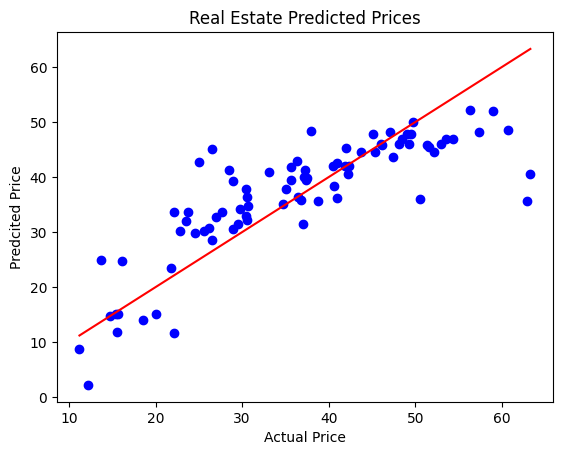

In [23]:
plt.scatter(y_test, y_pred, color = 'blue')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color = 'red')
plt.title("Real Estate Predicted Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predcited Price")
plt.show()

* The points scattered around the diagonal line indicate the deviation between the actual and predicted prices.
*  It indicates that the model's predictions are close to the actual prices. 
* This alignment between actual and predicted prices suggests that the model is performing well in making accurate predictions.

## Evaluation Metrics

#### Mean Squared Error

In [24]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 54.58094520086212


#### R-Squared

In [25]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.6746481382828176


#### Adjusted R-Squared

In [26]:
k = X_test.shape[1]
k

5

In [27]:
n = X_test.shape[0]
n

83

In [28]:
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.653521394015468

#### Coefficients and Intercept

In [29]:
print("Coefficients:")
print(model.coef_)

print("Intercept:")
print(model.intercept_)

Coefficients:
[-3.0790039  -5.7388054   3.25126781  2.92641771 -0.36641104]
Intercept:
38.051143871297825
